In [1]:
from IPython.display import display, HTML
from datetime import datetime
import pandas as pd
from Utils import read_csvs
from matplotlib import pyplot as plt

display(HTML("<style>.container{width: 100%}</style>"))

In [8]:
df = read_csvs(*(f"./data/avk_hackathon_data_transactions-{i}.csv" for i in range(1, 13)), parse_dates=["transaction_dttm"])

In [9]:
df.shape

(11987617, 10)

In [12]:
df.tail()

,party_rk,account_rk,financial_account_type_cd,transaction_dttm,transaction_type_desc,transaction_amt_rur,merchant_rk,merchant_type,merchant_group_rk,category
11987612,44990,111641,1,2019-12-31,Покупка,121.00,1940970.0,330.0,675.0,Фаст Фуд
11987613,53023,57593,2,2019-12-31,Покупка,102.29,1198564.0,286.0,NaN,Супермаркеты
11987614,78716,99133,1,2019-12-31,Покупка,175.00,2688766.0,229.0,901.0,Транспорт
11987615,73104,91039,2,2019-12-31,Покупка,185.99,1965313.0,286.0,878.0,Супермаркеты
11987616,42916,125082,1,2019-12-31,Покупка,431.00,2007688.0,330.0,675.0,Фаст Фуд


In [13]:
categories = [float('nan')] + sorted(c for c in set(df['category']) if isinstance(c, str))

index_for_category = {c: i for i, c in enumerate(categories)}

parties = [c for c in set(df['party_rk'])]
accounts = [c for c in set(df['account_rk'])]

print(categories, len(accounts), len(parties))

[nan, 'Duty Free', 'Авиабилеты', 'Автоуслуги', 'Аптеки', 'Аренда авто', 'Госсборы', 'Дом/Ремонт', 'Ж/д билеты', 'Животные', 'Искусство', 'Кино', 'Книги', 'Красота', 'Медицинские услуги', 'Музыка', 'НКО', 'Наличные', 'Образование', 'Одежда/Обувь', 'Отели', 'Развлечения', 'Разные товары', 'Рестораны', 'Связь/Телеком', 'Сервисные услуги', 'Спорттовары', 'Сувениры', 'Супермаркеты', 'Топливо', 'Транспорт', 'Турагентства', 'Фаст Фуд', 'Финансовые услуги', 'Фото/Видео', 'Цветы', 'Частные услуги'] 66583 50000


In [72]:
df["weeknum"] = df['transaction_dttm'].map(lambda x: x.isocalendar()[1])

In [88]:
df["cnt"] = 1

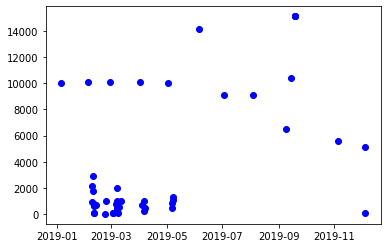

In [27]:
for p in parties:
    subdf = df[df['party_rk']==p]
    dates = subdf["transaction_dttm"]
    amt = subdf["transaction_amt_rur"]
#     plt.hist(subdf)
    plt.plot(dates, amt, "bo")
    break

In [89]:
grouped = df.groupby(["party_rk", "weeknum", "category"]).aggregate({'transaction_amt_rur':'sum', 'cnt': 'sum'}).reset_index()
display(grouped.shape)
grouped.head()

(4241496, 5)

,party_rk,weeknum,category,transaction_amt_rur,cnt
0,1,6,Одежда/Обувь,2955.00,1
1,1,6,Супермаркеты,6320.05,5
2,1,6,Фаст Фуд,923.00,3
3,1,7,Супермаркеты,711.20,1
4,1,8,Супермаркеты,993.10,1


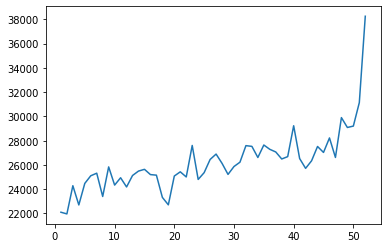

In [94]:
g1 = df.groupby(["party_rk", "weeknum"]).aggregate({'transaction_amt_rur': 'sum'}).reset_index().groupby(["weeknum"]).aggregate({'transaction_amt_rur': 'mean'}).reset_index()
plt.plot(g1['weeknum'], g1['transaction_amt_rur'])

In [95]:
for row in df.itertuples():
    break

In [96]:
row

Pandas(Index=0, party_rk=20337, account_rk=19666, financial_account_type_cd=1, transaction_dttm=Timestamp('2019-01-01 00:00:00'), transaction_type_desc='Покупка', transaction_amt_rur=84.0, merchant_rk=88676.0, merchant_type=348.0, merchant_group_rk=nan, category='Сувениры', weeknum=1, cnt=1)

In [98]:
dir(row)

['Index',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'account_rk',
 'category',
 'cnt',
 'count',
 'financial_account_type_cd',
 'index',
 'merchant_group_rk',
 'merchant_rk',
 'merchant_type',
 'party_rk',
 'transaction_amt_rur',
 'transaction_dttm',
 'transaction_type_desc',
 'weeknum']

In [101]:
dict(2)

{'Index': 0,
 'party_rk': 20337,
 'account_rk': 19666,
 'financial_account_type_cd': 1,
 'transaction_dttm': Timestamp('2019-01-01 00:00:00'),
 'transaction_type_desc': 'Покупка',
 'transaction_amt_rur': 84.0,
 'merchant_rk': 88676.0,
 'merchant_type': 348.0,
 'merchant_group_rk': nan,
 'category': 'Сувениры',
 'weeknum': 1,
 'cnt': 1}